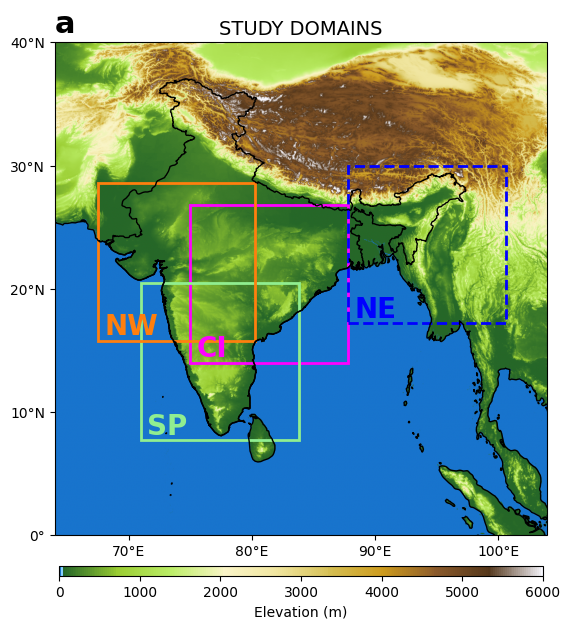

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import geopandas as gpd
import cmaps
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

# Load orography data from xarray dataset
DATA_PATH = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM01_StudyArea_RegionStats'
ds = xr.open_dataset(f'{DATA_PATH}/IND400_000_USGS_GTOPO30_30ARCSEC_100r.nc')
orog = ds['z']

# Define lonlat boxes
boxes = [
    {'lat_range': (14, 26.8), 'lon_range': (75, 87.8), 'label': 'CI', 'color': 'magenta'}, # :CI
    {'lat_range': (7.7, 20.5), 'lon_range': (71, 83.8), 'label': 'SP', 'color': 'lightgreen'},   # :SP
    {'lat_range': (15.8, 28.6), 'lon_range': (67.5, 80.3), 'label': 'NW', 'color': '#ff7f0e'},    # :NW
    {'lat_range': (17.2, 30), 'lon_range': (87.8, 100.6), 'label': 'NE', 'color': 'blue'},    # :NW
    ]

# Get latitude and longitude coordinates from xarray dataset
lats = ds['lat']
lons = ds['lon']

# Define plot extent
lat_range = (ds.lat.data.min(), ds.lat.data.max())
lon_range = (ds.lon.data.min(), ds.lon.data.max())

# Create figure and axis objects
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot orography data with inverted y-axis
im = ax.imshow(orog, 
               cmap= cmaps.OceanLakeLandSnow, #'terrain', #, #$'terrain',#cmaps.topo_15lev, #cmaps.OceanLakeLandSnow, #'ocean', #'terrain',
               alpha=1.0, vmin=0, vmax=6000,
               extent=[lon_range[0], lon_range[1], lat_range[1], lat_range[0]], 
               origin='upper', 
               transform=ccrs.PlateCarree())

# Add coastlines and colorbar
ax.coastlines(resolution='50m')
cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=50, shrink=0.78)
cbar.set_label('Elevation (m)')

# Add shapefile
shapefile_path = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/UTILITY/SHAPEFILES/India.shp'         
shapefile_df = gpd.read_file(shapefile_path)
countries = shapefile_df['geometry']

for country in countries:
    ax.add_geometries([country], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1)
ax.invert_yaxis()
# ax.set_axis_off()

# Add lonlat boxes
for box in boxes:
    lat_indices = np.where((lats >= box['lat_range'][0]) & (lats <= box['lat_range'][1]))[0]
    lon_indices = np.where((lons >= box['lon_range'][0]) & (lons <= box['lon_range'][1]))[0]
    ax.add_patch(plt.Rectangle((lons[lon_indices[0]].values, lats[lat_indices[0]].values), 
                               (lons[lon_indices[-1]].values - lons[lon_indices[0]].values), 
                               (lats[lat_indices[-1]].values - lats[lat_indices[0]].values), 
                               fill=False, lw=2, linestyle='--' if box['label']=='NE' else '-', 
                               edgecolor=box['color'], transform=ccrs.PlateCarree()))
    # Add box number label
    ax.text(lons[lon_indices[0]].values + 0.5, 
        lats[lat_indices[0]].values + 0.5,
        box['label'],
        color=box['color'],
        fontsize=20,
        fontweight='bold',
        transform=ccrs.PlateCarree()) 

ax.set_title('STUDY DOMAINS', fontsize=14)
# Add latitude and longitude ticks
ax.set_xticks(np.arange(70, 102, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(0, 41, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.text(0, 1.02, 'a', transform=ax.transAxes, fontsize=22, fontweight='bold')

save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure01_1.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()


/tmp/ipykernel_10004/1195245635.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['CI', 'SP', 'NW', 'NE'], fontsize=xticksize)


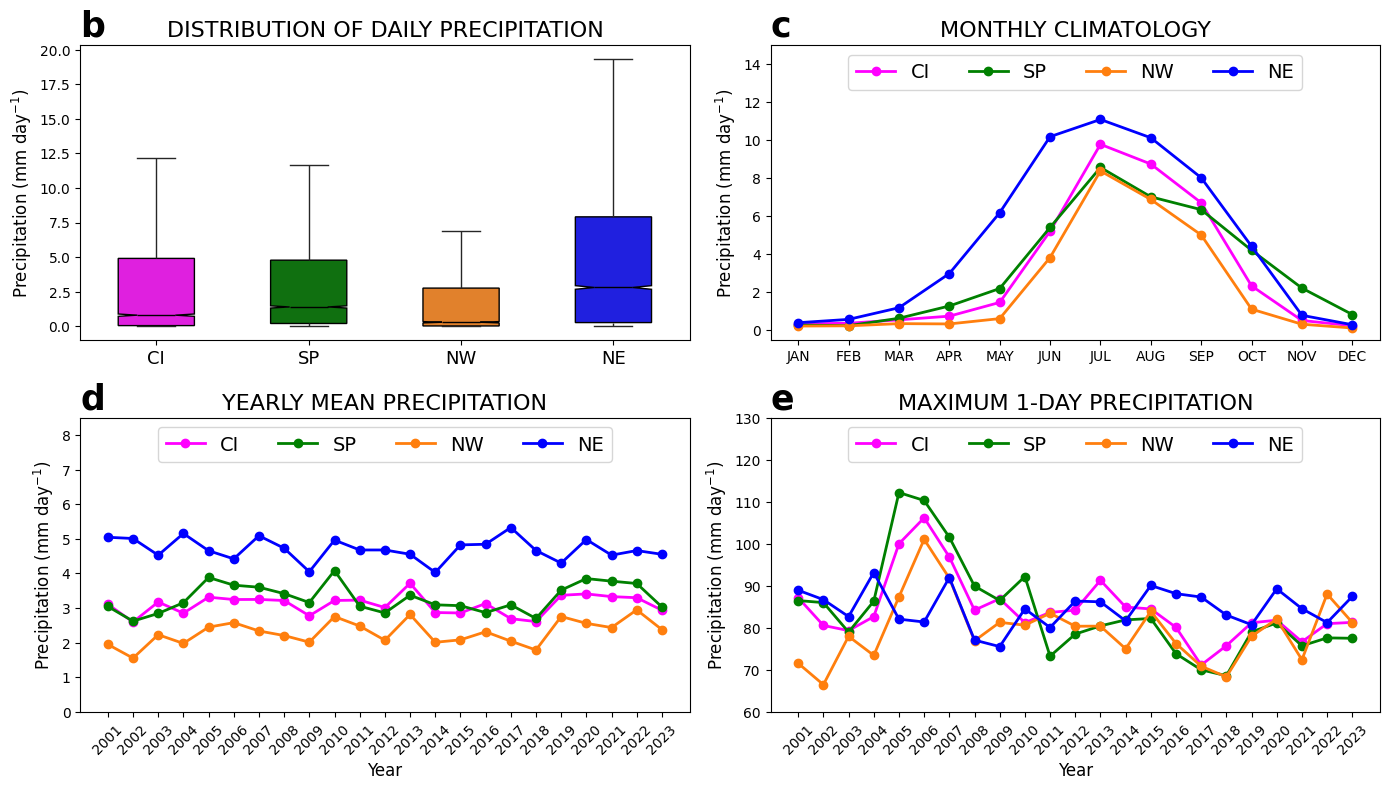

In [3]:
# Plot the data below

import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

DPATH = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM01_StudyArea_RegionStats'

titlesize = 16
ylabelsize = 12
xticksize = 13
linewidth = 2
marker = 'o'

# Create the GridSpec layout
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2)

###############################################################################################################
# (a) Box Plot
###############################################################################################################

ax_a = ax = fig.add_subplot(gs[0, 0])

d = xr.open_dataset(f'{DPATH}/IND_B123C5_EDA_FLDMEAN_2001_2023.nc')

ind_b1 = d.B01.data.flatten()
ind_b2 = d.B02.data.flatten()
ind_b3 = d.B03.data.flatten()
ind_b5 = d.C01.data.flatten()

# Set the background color of the plot
ax = plt.gca()
# ax.set_facecolor('white')  # Set the background color of the axis  #F0F0F0

linewidth = 2
shade = False

colors = ['magenta', 'green', '#ff7f0e', 'blue']

# Plot KDE with color shading
sns.boxplot(data = [ind_b1, ind_b2, ind_b3, ind_b5],
            palette = colors, 
            showfliers = False,
            width = 0.5,
            notch = True,
            boxprops = {'edgecolor': 'k', 'linewidth': 1},
            medianprops = {'color': 'k', 'linewidth': 1},
            ax = ax)

# Set plot title and labels
ax.set_title('DISTRIBUTION OF DAILY PRECIPITATION', fontsize=titlesize, fontweight='normal')
ax.set_xticklabels(['CI', 'SP', 'NW', 'NE'], fontsize=xticksize)
ax.set_ylabel('Precipitation (mm day$^{-1}$)', fontsize=ylabelsize)

# ax.legend(fontsize=14)

###############################################################################################################
# (b) Annual Cycle
###############################################################################################################

ax_b = ax = fig.add_subplot(gs[0, 1])

d = xr.open_dataset(f'{DPATH}/IND_B123C5_EDA_YMONMEAN_FLDMEAN_2001_2023.nc')

ind_b1 = d.B01.data.flatten()
ind_b2 = d.B02.data.flatten()
ind_b3 = d.B03.data.flatten()
ind_b5 = d.C01.data.flatten()
x = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Set the background color of the plot
ax = plt.gca()
# ax.set_facecolor('#F0F0F0')  # Set the background color of the axis 

# Plot KDE with color shading
ax.plot(x, ind_b1, color=colors[0], marker=marker, linewidth=linewidth, label='CI')
ax.plot(x, ind_b2, color=colors[1], marker=marker, linewidth=linewidth, label='SP')
ax.plot(x, ind_b3, color=colors[2], marker=marker, linewidth=linewidth, label='NW')
ax.plot(x, ind_b5, color=colors[3], marker=marker, linewidth=linewidth, linestyle='-', label='NE')

# Fill color between June and September
# ax.fill_between(x[5:9], 0, ax.get_ylim()[1], color='green', alpha=0.1)

# Set plot title and labels
ax.set_title('MONTHLY CLIMATOLOGY', fontsize=titlesize, fontweight='normal')
ax.set_xlabel('')
ax.set_ylabel('Precipitation (mm day$^{-1}$)', fontsize=ylabelsize)
ax.set_ylim(-0.5, 15)

# Show legend
ax.legend(['CI', 'SP', 'NW', 'NE'], fontsize=14, loc='upper center', ncol=4)

###############################################################################################################
# (c) Yearly Mean Precipitation
###############################################################################################################

ax_c = ax = fig.add_subplot(gs[1, 0])

d = xr.open_dataset(f'{DPATH}/IND_B123C5_EDA_YEARMEAN_FLDMEAN_2001_2023.nc')

ind_b1 = d.B01.data.flatten()
ind_b2 = d.B02.data.flatten()
ind_b3 = d.B03.data.flatten()
ind_b5 = d.C01.data.flatten()

x = np.arange(len(ind_b1))
years = np.arange(2001, 2024, 1)  # Generate the list of years

# Set the background color of the plot
ax = plt.gca()
# ax.set_facecolor('#F0F0F0')  # Set the background color of the axis 

# Plot line graphs
ax.plot(x, ind_b1, color=colors[0], marker=marker, linewidth=linewidth, label='CI')
ax.plot(x, ind_b2, color=colors[1], marker=marker, linewidth=linewidth, label='SP')
ax.plot(x, ind_b3, color=colors[2], marker=marker, linewidth=linewidth, label='NW')
ax.plot(x, ind_b5, color=colors[3], marker=marker, linewidth=linewidth, label='NE')

# # Plot vertical line for the year 2018
# year_2018_index = np.where(years == 2018)[0][0]
# ax.axvline(x=year_2018_index, color='green', linestyle=':', linewidth=2, label='2018')

# # Add labels "TRAIN" and "TEST" on the left and right sides of the line
# ax.text(year_2018_index - 0.9, ax.get_ylim()[1] * 1.1, 'TRAIN', color='grey', ha='right', fontsize=9)
# ax.text(year_2018_index + 0.9, ax.get_ylim()[1] * 1.1, 'TEST', color='grey', ha='left', fontsize=9)

# # Add vertical gridlines
# ax.grid(axis='x', linestyle=':', color='gray', linewidth=0.5)

ax.set_ylim(0,8.5)

# Set plot title and labels
ax.set_title('YEARLY MEAN PRECIPITATION', fontsize=titlesize, fontweight='normal')
ax.set_xticks(x)  # Set the x-axis tick positions
ax.set_xticklabels(years, rotation=45)  # Set the x-axis tick labels with rotation
ax.set_ylabel('Precipitation (mm day$^{-1}$)', fontsize=ylabelsize)
ax.set_xlabel('Year', fontsize=ylabelsize)

# Add legends
ax.legend(['CI', 'SP', 'NW', 'NE'], fontsize=14, loc='upper center', ncol=4)

###############################################################################################################
# (d) ETCCDI-Rx1Day
###############################################################################################################

ax_d = ax = fig.add_subplot(gs[1, 1])

d = xr.open_dataset(f'{DPATH}/IND_B123C5_EDA_RX1DAY_FLDMEAN_2001_2023.nc')

ind_b1 = d.B01.data.flatten()
ind_b2 = d.B02.data.flatten()
ind_b3 = d.B03.data.flatten()
ind_b5 = d.C01.data.flatten()

x = np.arange(len(ind_b1))
years = np.arange(2001, 2024, 1)  # Generate the list of years

# Set the background color of the plot
ax = plt.gca()
# ax.set_facecolor('#F0F0F0')  # Set the background color of the axis 

# Plot the lines
ax.plot(x, ind_b1, color=colors[0], marker=marker, linewidth=linewidth, label='CI')
ax.plot(x, ind_b2, color=colors[1], marker=marker, linewidth=linewidth, label='SP')
ax.plot(x, ind_b3, color=colors[2], marker=marker, linewidth=linewidth, label='NW')
ax.plot(x, ind_b5, color=colors[3], marker=marker, linewidth=linewidth, label='NE')

ax.set_ylim(60,130)

# Set plot title and labels
ax.set_title('MAXIMUM 1-DAY PRECIPITATION', fontsize=titlesize, fontweight='normal')
ax.set_xticks(x)  # Set the x-axis tick positions
ax.set_xticklabels(years, rotation=45)  # Set the x-axis tick labels with rotation
ax.set_ylabel('Precipitation (mm day$^{-1}$)', fontsize=ylabelsize)
ax.set_xlabel('Year', fontsize=ylabelsize)

# # Plot vertical line for the year 2018
# year_2018_index = np.where(years == 2018)[0][0]
# ax.axvline(x=year_2018_index, color='green', linestyle=':', linewidth=2, label='2018')
# # Add labels "TRAIN" and "TEST" on the left and right sides of the line
# ax.text(year_2018_index - 1, ax.get_ylim()[1] * 0.98, 'TRAIN', color='grey', ha='right', fontsize=9)
# ax.text(year_2018_index + 1, ax.get_ylim()[1] * 0.98, 'TEST', color='grey', ha='left', fontsize=9)
# # Add vertical gridlines
# ax.grid(axis='x', linestyle=':', color='gray', linewidth=0.5)

# Show legend
ax.legend(['CI', 'SP', 'NW', 'NE'], fontsize=14, loc='upper center', ncol=4)

##############################################################################################################
# Common formatting
##############################################################################################################

# Add "a)", "b)", "c)", "d)" markers in the left upper corner of each subplot
ax_a.text(0, 1.03, 'b', transform=ax_a.transAxes, fontsize=25, fontweight='bold')
ax_b.text(0, 1.03, 'c', transform=ax_b.transAxes, fontsize=25, fontweight='bold')
ax_c.text(0, 1.03, 'd', transform=ax_c.transAxes, fontsize=25, fontweight='bold')
ax_d.text(0, 1.03, 'e', transform=ax_d.transAxes, fontsize=25, fontweight='bold')

# Adjust the spacing between subplots
plt.tight_layout()

# Show/Save the plot
save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure01_2.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()